# Goal
1. Get the average overall score of each year and plot the trend
2. Get the number of the comments of each year and plot the trend

Data set: Amazon Review data (small data subset from Amazon Instant Video), UCSD collected from Amazon http://jmcauley.ucsd.edu/data/amazon/ 
Usually the number of users and the number of comments are in positive corralation, thus we could predict the user amount by the comment trend.

In [5]:
import pandas as pd
import gzip
%matplotlib inline

In [10]:
def parse(path):
    f= gzip.open(path,'r')
    for line in f:
        yield eval(line)
        
def load_data(path:str) -> pd.DataFrame: # input data type is str, return type is DF
    data = [d for d in parse(path)]
    return pd.DataFrame.from_dict(data)

In [8]:
!ls

amazon-instant-video-review.ipynb
Practice_Projects
python_DS.ipynb
reviews_Amazon_Instant_Video_5.json.gz


In [12]:
dataset = load_data('reviews_Amazon_Instant_Video_5.json.gz')
dataset.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000H00VBQ,"[0, 0]",2.0,I had big expectations because I love English ...,"05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me,1399075200
1,B000H00VBQ,"[0, 0]",5.0,I highly recommend this series. It is a must f...,"09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV,1346630400
2,B000H00VBQ,"[0, 1]",1.0,This one is a real snoozer. Don't believe anyt...,"10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me,1381881600
3,B000H00VBQ,"[0, 0]",4.0,Mysteries are interesting. The tension betwee...,"10 30, 2013",A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Robson Green is mesmerizing,1383091200
4,B000H00VBQ,"[1, 1]",5.0,"This show always is excellent, as far as briti...","02 11, 2009",A16XRPF40679KG,Michael Dobey,Robson green and great writing,1234310400


In [28]:
# group the data by year, want the output as: 
# {'2014':[1.0, 2.0, 4.0, ...],'2015':[2.0,5.0, ...]}

def group_by_year(df):
    scores={}
    for _,row in df.iterrows():  # _ as a placeholder
        year = row.reviewTime.split()[-1]
        if year not in scores:
            scores[year]=[]
        scores[year].append(float(row.overall))
    return scores

def avg_score_by_year(df):
    scores = group_by_year(df)
    avg_score = {year: sum(l)/len(l) for year,l in scores.items()} #dict comprehension 
    return pd.DataFrame(sorted(list(avg_score.items())),columns = ['year','score'])
    

In [34]:
avg_score_by_year = avg_score_by_year(dataset)
avg_score_by_year.set_index('year',inplace=True)
avg_score_by_year

,score
year,
2000,5.000000
2004,4.000000
2006,4.937500
2007,4.245763
2008,4.298701
2009,4.251381
2010,4.093085
2011,4.012414
2012,4.111845


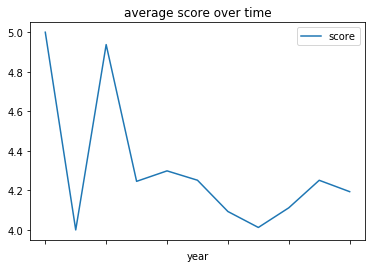

In [36]:
avg_score_by_year.plot(title='average score over time')

In [41]:
def add_year_col(df):
    df['year']=df['reviewTime'].split()[-1]
    return df


In [43]:
avg_score = (dataset.apply(lambda x:add_year_col(x),axis = 1)[['overall','year']] ##pandorable
            .groupby('year')
            .agg(['mean','count']))
avg_score

overall       
          mean  count
year                 
2000  5.000000      1
2004  4.000000      1
2006  4.937500     16
2007  4.245763    118
2008  4.298701    231
2009  4.251381    362
2010  4.093085    376
2011  4.012414    725
2012  4.111845   2727
2013  4.251077  16019
2014  4.193535  16550

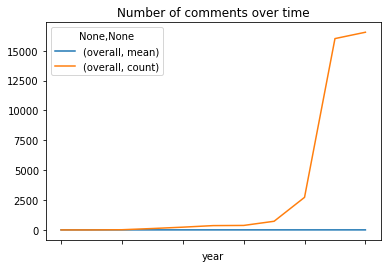

In [47]:
avg_score.plot(title='Number of comments over time')

This trend represents the number of comments over time, since it has positive correlation with the number of users, thus we believe that this plot is also the trend of how Amazon instant video users grow over the years. 
Amazon instant video back to the years required subsciption independently, and it has been merged to Amazon Prime since 2011, therefore the users amount has a dramatic increase since 2011.

## Get the top words from comments


In [48]:
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import FreqDist
from string import punctuation

In [49]:
lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')
trans = str.maketrans(punctuation, ' '*len(punctuation)) # make all the punctuation to spaces

In [52]:
def preprocess(line:str) -> str:
    line = str(line).translate(trans)
    line = word_tokenize(line.lower())
    line = [lemmatizer.lemmatize(t,'v') for t in line if t not in stop] 
    return line

In [63]:
str(corpus[0]).split()

["['big',",
 "'expectations',",
 "'love',",
 "'english',",
 "'tv',",
 "'particular',",
 "'investigative',",
 "'detective',",
 "'stuff',",
 "'guy',",
 "'really',",
 "'bore',",
 "'appeal']"]

In [58]:
corpus = []
for text in (dataset.reviewText):
    corpus.append(preprocess(text))

In [64]:
tokens = [word for line in corpus for word in str(line).split()]

In [67]:
freqlist = FreqDist(tokens)
freqlist.most_common(20)

[("'show',", 28632),
 ("'season',", 18607),
 ("'watch',", 15682),
 ("'like',", 15542),
 ("'one',", 13942),
 ("'character',", 13564),
 ("'get',", 12950),
 ("'series',", 11717),
 ("'good',", 11679),
 ("'make',", 11155),
 ("'see',", 10890),
 ("'34',", 9868),
 ("'go',", 9289),
 ("'great',", 9151),
 ("'love',", 8782),
 ("'time',", 8674),
 ("'film',", 8182),
 ("'really',", 8034),
 ("'would',", 7961),
 ("'well',", 7747)]

In [ ]:
# wordcloud